In [144]:
def new_dataset(dataset, step_size):
	data_X, data_Y = [], []
	for i in range(len(dataset)-step_size-1):
		a = dataset[i:(i+step_size), 0]
		data_X.append(a)
		data_Y.append(dataset[i + step_size, 0])
	return np.array(data_X), np.array(data_Y)

In [145]:
data = [10,20,30,40,50,60,70,80,90,100]


In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
import preprocessing 

In [147]:
# FOR REPRODUCIBILITY
np.random.seed(7)

# IMPORTING DATASET 
dataset = pd.read_csv('apple_share_price.csv', usecols=[1,2,3,4])



In [148]:
dataset.head()

,Open,High,Low,Close
0,156.60,158.57,156.07,157.48
1,159.90,160.00,154.63,155.32
2,159.26,161.27,159.11,161.06
3,158.60,161.83,158.27,160.08
4,157.06,158.92,156.67,158.81


In [149]:
dataset = dataset.reindex(index = dataset.index[: :-1])

In [150]:
dataset.head()
type(dataset)

pandas.core.frame.DataFrame

In [151]:
obs = np.arange(1, len(dataset) + 1, 1)

In [152]:
OHLC_avg = dataset.mean(axis = 1)
HLC_avg = dataset[['High', 'Low', 'Close']].mean(axis = 1)
close_val = dataset[['Close']]

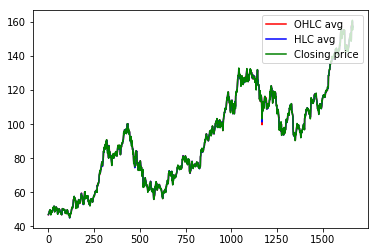

In [153]:
plt.plot(obs, OHLC_avg, 'r', label = 'OHLC avg')
plt.plot(obs, HLC_avg, 'b', label = 'HLC avg')
plt.plot(obs, close_val, 'g', label = 'Closing price')
plt.legend(loc = 'upper right')
plt.show()

In [154]:
OHLC_avg = np.reshape(OHLC_avg.values, (len(OHLC_avg),1)) # 1664
scaler = MinMaxScaler(feature_range=(0, 1))
OHLC_avg = scaler.fit_transform(OHLC_avg)

In [155]:
train_OHLC = int(len(OHLC_avg) * 0.75)
test_OHLC = len(OHLC_avg) - train_OHLC
train_OHLC, test_OHLC = OHLC_avg[0:train_OHLC,:], OHLC_avg[train_OHLC:len(OHLC_avg),:]

In [156]:
trainX, trainY = preprocessing.new_dataset(train_OHLC, 2)
testX, testY = preprocessing.new_dataset(test_OHLC, 2)

In [157]:
trainX.shape

(1245, 2)

In [158]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
step_size = 2

In [159]:
trainX.shape

(1245, 1, 2)

In [160]:
trainY.shape

(1245,)

In [119]:
model = Sequential()
model.add(LSTM(32, input_shape=(1, step_size), return_sequences = True))
model.add(LSTM(16))
model.add(Dense(1))
model.add(Activation('linear'))

In [120]:
model.compile(loss='mean_squared_error', optimizer='adagrad') # Try SGD, adam, adagrad and compare!!!
model.fit(trainX, trainY, epochs=50, batch_size=10, verbose=2)

Epoch 1/50
 - 1s - loss: 0.0143
Epoch 2/50
 - 0s - loss: 6.1017e-04
Epoch 3/50
 - 0s - loss: 4.7494e-04
Epoch 4/50
 - 0s - loss: 4.3599e-04
Epoch 5/50
 - 0s - loss: 3.9992e-04
Epoch 6/50
 - 0s - loss: 3.6863e-04
Epoch 7/50
 - 0s - loss: 3.4369e-04
Epoch 8/50
 - 0s - loss: 3.2146e-04
Epoch 9/50
 - 0s - loss: 3.0079e-04
Epoch 10/50
 - 0s - loss: 2.7967e-04
Epoch 11/50
 - 0s - loss: 2.6591e-04
Epoch 12/50
 - 0s - loss: 2.5324e-04
Epoch 13/50
 - 0s - loss: 2.3908e-04
Epoch 14/50
 - 0s - loss: 2.2914e-04
Epoch 15/50
 - 0s - loss: 2.2034e-04
Epoch 16/50
 - 0s - loss: 2.1135e-04
Epoch 17/50
 - 0s - loss: 2.0339e-04
Epoch 18/50
 - 0s - loss: 1.9719e-04
Epoch 19/50
 - 0s - loss: 1.9234e-04
Epoch 20/50
 - 0s - loss: 1.8747e-04
Epoch 21/50
 - 0s - loss: 1.8267e-04
Epoch 22/50
 - 0s - loss: 1.8002e-04
Epoch 23/50
 - 0s - loss: 1.7688e-04
Epoch 24/50
 - 0s - loss: 1.7297e-04
Epoch 25/50
 - 0s - loss: 1.6949e-04
Epoch 26/50
 - 0s - loss: 1.6842e-04
Epoch 27/50
 - 0s - loss: 1.6700e-04
Epoch 28/50
 -

In [121]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [122]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


In [123]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train RMSE: %.2f' % (trainScore))


Train RMSE: 1.42


In [124]:
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test RMSE: %.2f' % (testScore))

Test RMSE: 1.83


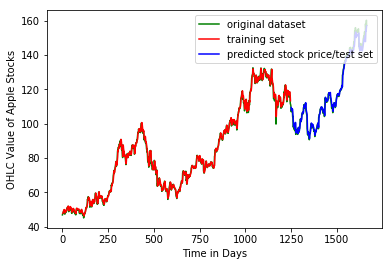

ValueError: Error when checking input: expected lstm_7_input to have shape (1, 2) but got array with shape (1, 1)

In [125]:
trainPredictPlot = np.empty_like(OHLC_avg)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[step_size:len(trainPredict)+step_size, :] = trainPredict

# CREATING SIMILAR DATASSET TO PLOT TEST PREDICTIONS
testPredictPlot = np.empty_like(OHLC_avg)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(step_size*2)+1:len(OHLC_avg)-1, :] = testPredict

# DE-NORMALIZING MAIN DATASET 
OHLC_avg = scaler.inverse_transform(OHLC_avg)

# PLOT OF MAIN OHLC VALUES, TRAIN PREDICTIONS AND TEST PREDICTIONS
plt.plot(OHLC_avg, 'g', label = 'original dataset')
plt.plot(trainPredictPlot, 'r', label = 'training set')
plt.plot(testPredictPlot, 'b', label = 'predicted stock price/test set')
plt.legend(loc = 'upper right')
plt.xlabel('Time in Days')
plt.ylabel('OHLC Value of Apple Stocks')
plt.show()

# PREDICT FUTURE VALUES
last_val = testPredict[-1]
last_val_scaled = last_val/last_val
next_val = model.predict(np.reshape(last_val_scaled, (1,1,1)))
print("Last Day Value:", np.asscalar(last_val))
print("Next Day Value:", np.asscalar(last_val*next_val))